In [1]:
from src.processing import RoiAnalyser

In [2]:
# path to the data directory containing image files
DATA_DIR = "data/#2451333014_ZProj_B IVA76"

# path to the directory where output files (results, plots, etc.) will be saved
OUTPUT_DIR = "out"

# list of imaging modalities/channels to process (e.g., DAPI, TRITC, GFP)
MODALITIES = ["dapi", "tritc", "gfp"]

Loaded files:
  dapi: 'E2ROI3_-2_2_1_ZProj[Confocal DAPI 405,442]_001.tif'
  tritc: 'E2ROI3_-2_4_1_ZProj[Confocal TRITC 556,600]_001.tif'
  gfp: 'E2ROI3_-2_3_1_ZProj[Confocal GFP 472,520]_001.tif'

Analysing: E2ROI3, 
Step 1: Preprocessing DAPI image...


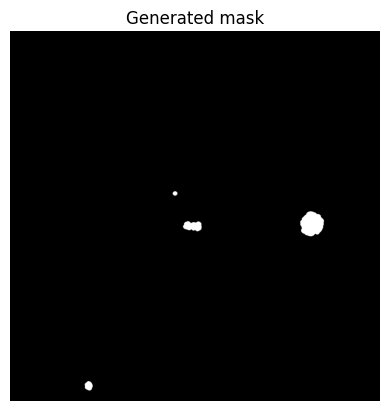

Step 2: Finding clusters...
  Found 1 clusters


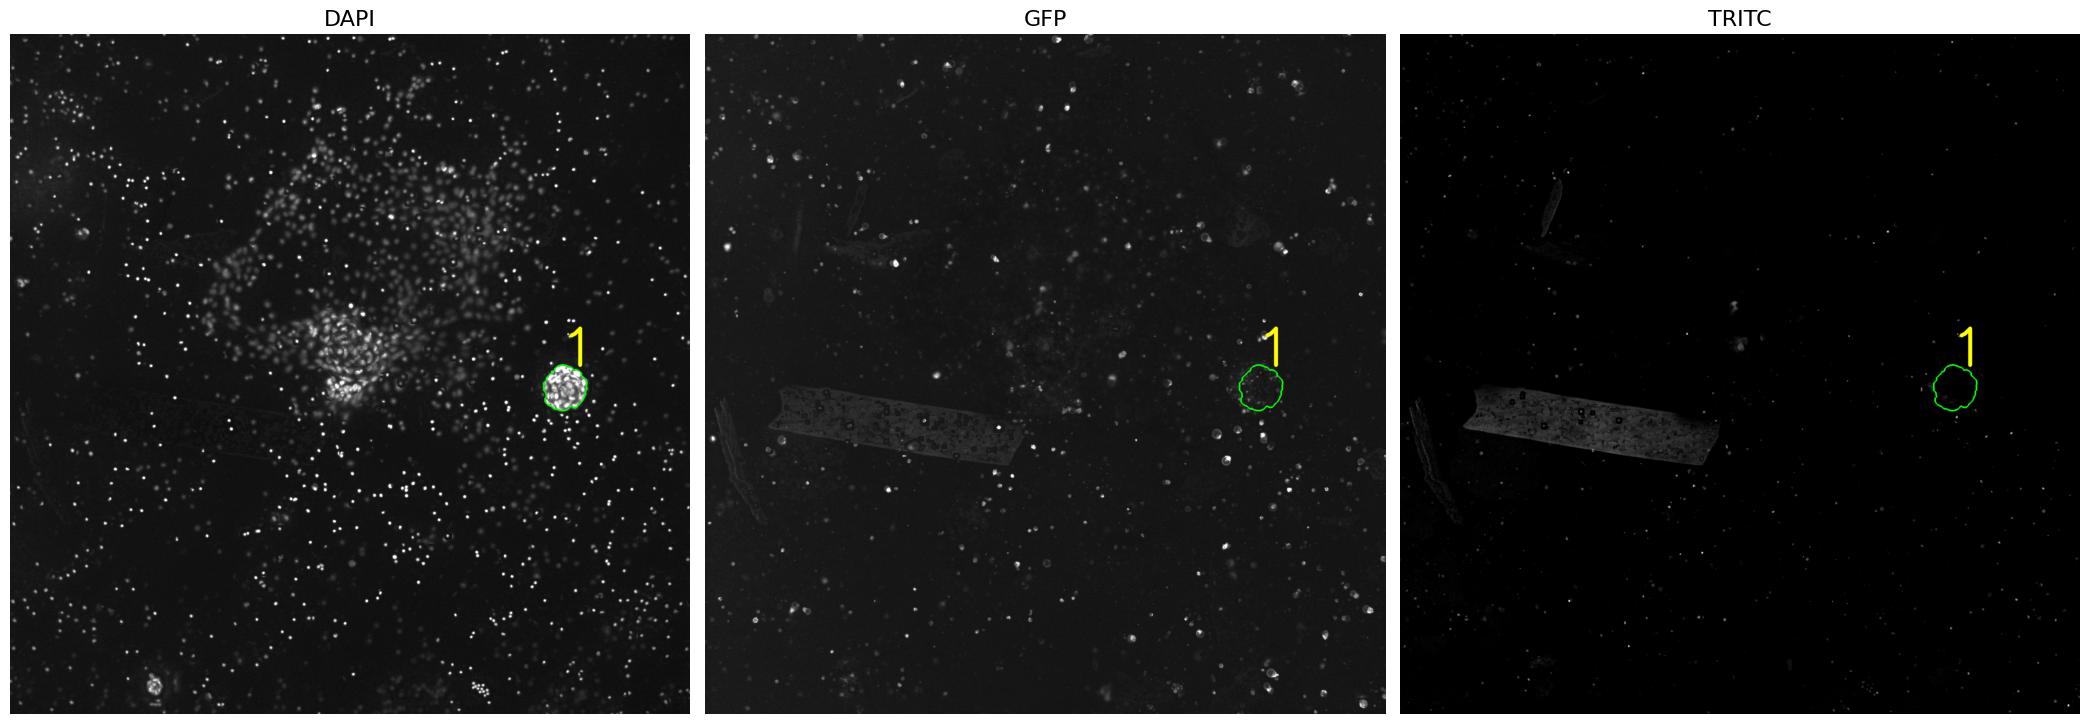

Step 3: Building GFP and TRITC histograms for clusters...


In [3]:
# name of the ROI
roi_name = "E2ROI3"

# set to the required Z or leave empty ""
z = ""

# minimum area (in pixels) required to keep a detected cluster; clusters smaller than this are ignored
area_threshold = 8000

# thresholding method for image segmentation: choose from "yen", "otsu", or "triangle"
# "yen" works in most cases
# "triangle" should work better for blurry objects
thresholding_method = "yen"

analyser = RoiAnalyser(
    DATA_DIR, roi_name, OUTPUT_DIR, MODALITIES,
    area_threshold=area_threshold,
    thresholding_method=thresholding_method,
    plot_bright=False,
    verbose=False
)
clusters, channel_histograms = analyser.run_analysis(z)

### (**OPTIONAL**) Remove clusters

In [4]:
clusters_to_remove = [] # can be one [1], or multiple [1, 2]
if len(clusters_to_remove) > 0:
    clusters, channel_histograms = analyser.remove_clusters(clusters, clusters_to_remove)

### (**OPTIONAL**) Run the histogram analysis for different Z

In [ ]:
z = "Z6"    # change me

print("Step 3.5: Repeat for additional Zs...")
channels = analyser.repeat_for_additional_images(z, clusters, channel_histograms)

### Save the calculated histograms as `.csv` files

In [5]:
# save histograms
print("Step 4: Saving histograms")
out_files = analyser.save_histogram(channel_histograms)

Step 4: Saving histograms

Saving histogram data for ROI: E2ROI3
  Successfully saved GFP histogram data to 'out/E2ROI3/E2ROI3_GFP.csv'
  Successfully saved TRITC histogram data to 'out/E2ROI3/E2ROI3_TRITC.csv'


### Calculate apopnec ratio

In [6]:
# change the `start_row`
params = {
    "GFP": {"file": out_files["GFP"], "start_row": 72},
    "TRITC": {"file": out_files["TRITC"], "start_row": 72},
}

print("Step 5: Calculate apopnec ratio...")
for name, args in params.items():
    print(f"  For {name}", end=", ")
    analyser.apopnec_ratio(file=args["file"], start_row=args["start_row"])

print("------------------")
print("Done :)")

Step 5: Calculate apopnec ratio...
  For GFP, saved as 'out/E2ROI3/E2ROI3_GFP.csv'
  For TRITC, saved as 'out/E2ROI3/E2ROI3_TRITC.csv'
------------------
Done :)
